In [1]:
import sympy as sym

import numpy as np

import itertools

sym.init_printing()

In [135]:
from importlib.machinery import SourceFileLoader


evolution = SourceFileLoader("evolution", "src/evolution.py").load_module()
formulation = SourceFileLoader("formulation", "src/formulation.py").load_module()

simulation = SourceFileLoader("simulation", "src/simulation.py").load_module()

In [3]:
import matplotlib.pyplot as plt
import matplotlib

from collections import Counter

In [4]:
from tqdm import tqdm

In [5]:
import pandas as pd

**Defining variables**

In [6]:
y_1, p_1, q_1 = sym.symbols("y_1, p_1, q_1")
y_2, p_2, q_2 = sym.symbols("y_2, p_2, q_2")

In [7]:
s_one = (y_1, p_1, q_1)
s_two = (y_2, p_2, q_2)

In [8]:
s_one

**Get expression using code**

In [9]:
d = sym.symbols("delta")

In [10]:
v_zero = formulation.expected_distribution_opening_round(s_one, s_two)

In [11]:
v_zero

In [12]:
M = formulation.markov_chain_for_reactive_strategies(s_one, s_two)

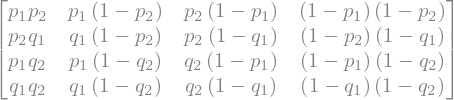

In [13]:
sym.Matrix(M)

In [14]:
inverse = sym.Matrix(np.identity(4) - d * M).inverse_ADJ()

In [15]:
inverse = inverse.applyfunc(sym.simplify)

In [16]:
expression = (1 - d) * sym.Matrix(v_zero).reshape(1, 4) @ inverse

**Check the written mathematics**

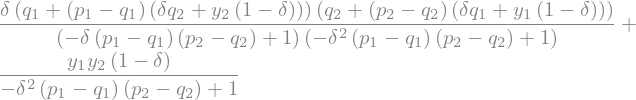

In [17]:
u_R = formulation.probability_being_in_state_R(s_one, s_two, d)
u_R

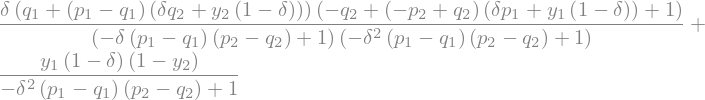

In [18]:
u_S = formulation.probability_being_in_state_S(s_one, s_two, d)
u_S

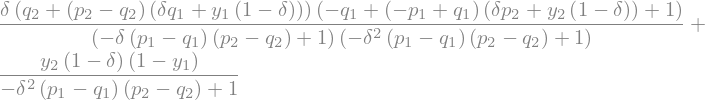

In [19]:
u_T = formulation.probability_being_in_state_T(s_one, s_two, d)
u_T

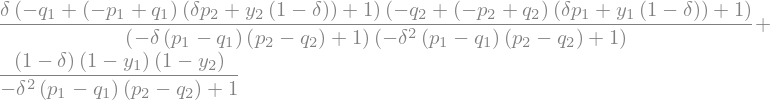

In [20]:
u_P = formulation.probability_being_in_state_P(s_one, s_two, d)
u_P

In [21]:
(u_R - expression[0]).simplify(), (u_S - expression[1]).factor()

In [22]:
(u_T - expression[2]).factor(), (u_P - expression[3]).factor()

**Check functions for analysis of ALLD into GTFT**

In [23]:
q = sym.symbols("q")

N, k = sym.symbols("N, k")

In [24]:
ALLD = (0, 0, 0)
GTFT = (1, 1, q)

**States of Eq. (9) and (10)**

In [25]:
formulation.probability_being_in_state_R(GTFT, GTFT, d).factor()

In [26]:
formulation.probability_being_in_state_R(GTFT, ALLD, d).factor()

In [27]:
formulation.probability_being_in_state_R(GTFT, ALLD, d).factor()

In [28]:
formulation.probability_being_in_state_T(ALLD, GTFT, d).factor()

In [29]:
(
    formulation.probability_being_in_state_S(GTFT, GTFT, d).factor(),
    formulation.probability_being_in_state_T(GTFT, GTFT, d).factor(),
    formulation.probability_being_in_state_P(GTFT, GTFT, d).factor(),
)

In [30]:
formulation.probability_being_in_state_R(ALLD, GTFT, d).factor(), main.probability_being_in_state_S(
    ALLD, GTFT, d
).factor()

NameError: name 'main' is not defined

In [ ]:
formulation.probability_being_in_state_T(ALLD, GTFT, d).factor(), main.probability_being_in_state_P(
    ALLD, GTFT, d
).factor()

**Ep. (11)**

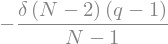

In [34]:
evolution.probability_of_receiving_payoffs(
    resident=GTFT,
    mutant=ALLD,
    resident_state=formulation.probability_being_in_state_R,
    mutant_state=formulation.probability_being_in_state_P,
    N=N,
    k=1,
    delta=d,
).factor()

In [38]:
evolution.probability_of_receiving_payoffs(
    resident=ALLD,
    mutant=GTFT,
    resident_state=formulation.probability_being_in_state_S,
    mutant_state=formulation.probability_being_in_state_T,
    N=N,
    k=1,
    delta=d,
).factor()

In [41]:
evolution.probability_of_receiving_payoffs(
    resident=ALLD,
    mutant=GTFT,
    resident_state=formulation.probability_being_in_state_P,
    mutant_state=formulation.probability_being_in_state_P,
    N=N,
    k=1,
    delta=d,
).factor()

In [42]:
evolution.probability_of_receiving_payoffs(
    resident=GTFT,
    mutant=ALLD,
    resident_state=formulation.probability_being_in_state_P,
    mutant_state=formulation.probability_being_in_state_S,
    N=N,
    k=1,
    delta=d,
).factor()

In [43]:
formulation.probability_being_in_state_S(GTFT, ALLD, d).factor()

In [44]:
formulation.probability_being_in_state_R(ALLD, GTFT, d).factor()

In [45]:
formulation.probability_being_in_state_R(ALLD, ALLD, d).factor()

In [47]:
evolution.probability_of_receiving_payoffs(
    resident=GTFT,
    mutant=ALLD,
    resident_state=formulation.probability_being_in_state_S,
    mutant_state=formulation.probability_being_in_state_R,
    N=N,
    k=1,
    delta=d,
).factor()

**Fixation probabilities**

In [48]:
R, S, T, P = sym.symbols('R, S, T, P')

In [49]:
b = sym.symbols('beta')
b

In [50]:
expr = (evolution.probability_mutant_increases(GTFT, ALLD, N, k=1, delta=d, beta=b, payoffs=[R, S, T, P]) /
        evolution.probability_mutant_descreases(GTFT, ALLD, N, k=1, delta=d, beta=b, payoffs=[R, S, T, P]))


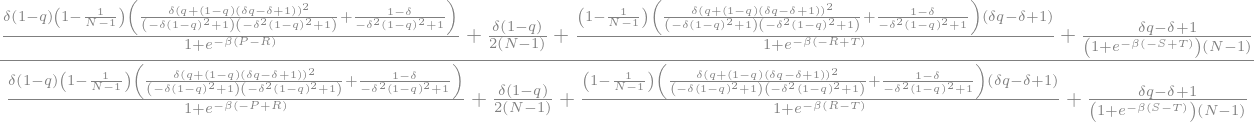

In [51]:
expr

In [52]:
numerator_first_term = ((1 - d + d * q) / (1 + sym.exp(-b * (T - R))) + ((d * (1 - q)) / (1 + sym.exp(-b * (P - R)))))

In [53]:
numerator_second_term = ((1 - d + d * q) / (1 + sym.exp(-b * (T - S))) + ((d * (1 - q)) / 2))

In [54]:
denominator_first_term = ((1 - d + d * q) / (1 + sym.exp(-b * (R - T))) + ((d * (1 - q)) / (1 + sym.exp(-b * (R - P)))))

In [55]:
denominator_second_term = ((1 - d + d * q) / (1 + sym.exp(-b * (S - T))) + ((d * (1 - q)) / 2))

In [56]:
written_expr = (((N - 2) / (N - 1)) * numerator_first_term + (1 / (N - 1)) * numerator_second_term) / (((N - 2) / (N - 1)) * denominator_first_term + (1 / (N - 1)) * denominator_second_term)

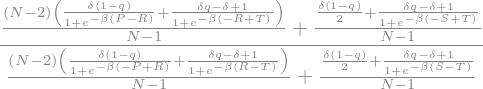

In [57]:
written_expr

In [58]:
(expr - written_expr).factor()

**Simulations** - **Example in notes**

**Plotting simulation results**

In [75]:
df = pd.read_csv('expected_payoff_data.csv', header=None)

In [76]:
x, y = simulation._reshape_data(df)

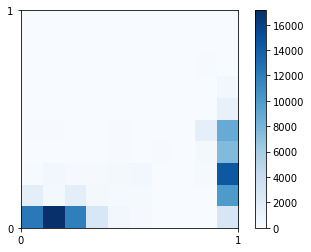

In [77]:
cmap = matplotlib.cm.get_cmap('Blues')

heatmap, xedges, yedges = np.histogram2d(x, y, bins=10)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, cmap=cmap, origin='lower')

plt.colorbar()
plt.xticks(np.linspace(0, 1, 2));
plt.yticks(np.linspace(0, 1, 2));
plt.show()

In [279]:
df = pd.read_csv('stochastic_payoff_data.csv', header=None)

In [280]:
x, y = simulation._reshape_data(df)

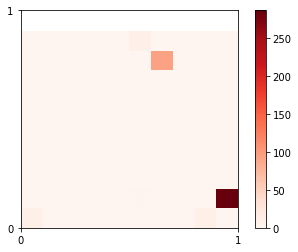

In [281]:
cmap = matplotlib.cm.get_cmap('Reds')

heatmap, xedges, yedges = np.histogram2d(x, y, bins=10)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, cmap=cmap, origin='lower')

plt.colorbar()
plt.xticks(np.linspace(0, 1, 2));
plt.yticks(np.linspace(0, 1, 2));
plt.show()